 Step we need to follow:
    1. Check the null value of both train and test columns
    2. Remove the columns which have null values more than 50 %
    3. Fill the null value with proper requirments. 
    

In [525]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [527]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

# Dataset Checking

In [528]:
len(train)

1460

In [529]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [532]:
dataset = [train,test]
for item in dataset:
    print(item.shape)

(1460, 81)
(1459, 80)


## Null Value Check

In [533]:
len(train.columns)

81

In [534]:
col = train.columns
valid_col = []
null_col= []
for i in col:
    x = train[i].isnull().sum()
    if x > 0:
        null_col.append(i)
    else:
        valid_col.append(i)    

In [541]:
print("Total rows : ", len(train))
print("Non Null Columns : ", len(valid_col))
print("Null columns : ",  len(null_col))

Total rows :  1460
Non Null Columns :  62
Null columns :  19


In [482]:
null_col

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [542]:
for i in null_col:
    print(i, "=",  train[i].isnull().sum())

LotFrontage = 259
Alley = 1369
MasVnrType = 8
MasVnrArea = 8
BsmtQual = 37
BsmtCond = 37
BsmtExposure = 38
BsmtFinType1 = 37
BsmtFinType2 = 38
Electrical = 1
FireplaceQu = 690
GarageType = 81
GarageYrBlt = 81
GarageFinish = 81
GarageQual = 81
GarageCond = 81
PoolQC = 1453
Fence = 1179
MiscFeature = 1406


In [553]:
train.drop(['Id','Alley','PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [543]:
col = test.columns
valid_col = []
null_col= []
for i in col:
    x = test[i].isnull().sum()
    if x > 0:
        null_col.append(i)
    else:
        valid_col.append(i)    

In [544]:
print("Total rows : ", len(test))
print("Non Null Columns : ", len(valid_col))
print("Null columns : ",  len(null_col))

Total rows :  1459
Non Null Columns :  47
Null columns :  33


In [545]:
null_col

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [547]:
for i in null_col:
    print(i, "=",  test[i].isnull().sum())

MSZoning = 4
LotFrontage = 227
Alley = 1352
Utilities = 2
Exterior1st = 1
Exterior2nd = 1
MasVnrType = 16
MasVnrArea = 15
BsmtQual = 44
BsmtCond = 45
BsmtExposure = 44
BsmtFinType1 = 42
BsmtFinSF1 = 1
BsmtFinType2 = 42
BsmtFinSF2 = 1
BsmtUnfSF = 1
TotalBsmtSF = 1
BsmtFullBath = 2
BsmtHalfBath = 2
KitchenQual = 1
Functional = 2
FireplaceQu = 730
GarageType = 76
GarageYrBlt = 78
GarageFinish = 78
GarageCars = 1
GarageArea = 1
GarageQual = 78
GarageCond = 78
PoolQC = 1456
Fence = 1169
MiscFeature = 1408
SaleType = 1


In [548]:
test.drop(['Id','Alley','PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [549]:
test.shape

(1459, 75)

In [550]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [551]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


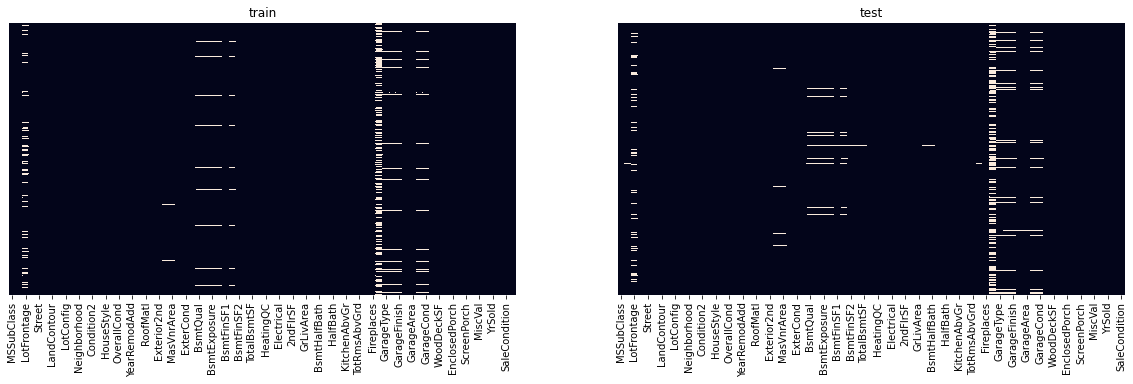

In [554]:
plt.figure(figsize=(20,5)) # set figure size 20 width 5 height
plt.subplot(1,2,1) # create subplot 1 rows, 2 columns and 1 no position
sns.heatmap(train.isnull(),yticklabels=False,cbar=False);
plt.title('train');
plt.subplot(1,2,2) # create subplot 1 rows, 2 columns and 2 no position
sns.heatmap(test.isnull(),yticklabels=False,cbar=False);
plt.title('test');

In [555]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## Seperate columns by their datatype

In [590]:
def df_null_check(item):
    col = item.columns
    intfloatdt = []
    objectdt = []
    for i in col:
        x = item[i].isnull().sum()
        print(i, '=', x)

In [562]:
df_null_check(train)

LotFrontage = 259
MasVnrType = 8
MasVnrArea = 8
BsmtQual = 37
BsmtCond = 37
BsmtExposure = 38
BsmtFinType1 = 37
BsmtFinType2 = 38
Electrical = 1
FireplaceQu = 690
GarageType = 81
GarageYrBlt = 81
GarageFinish = 81
GarageQual = 81
GarageCond = 81


In [576]:
train["LotFrontage"].describe()
train["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [577]:
col = train.columns
intfloatdt = []
objectdt = []
for item in col:
    x = train[item].isnull().sum()
    if x > 0:
        dt = train[item].dtypes
        if dt == 'int64' or dt == 'float64':
            intfloatdt.append(item)
        elif dt == 'object':
            objectdt.append(item)

In [ ]:
intfloatdt

In [ ]:
objectdt

In [ ]:
for item in  intfloatdt:
    print(item , '=' , train[item].isnull().sum())

In [ ]:
for item in intfloatdt:
    print('\t', item, '\n')
    print(train[item].describe(), "\n")

In [ ]:
for item in  objectdt:
    print(item , '=' , train[item].isnull().sum())

In [ ]:
for item in objectdt:
    print('\t', item, '\n')
    print(train[item].describe())

## Fill Missing Values

In [ ]:
for item in intfloatdt:
    train[item]=train[item].fillna(train[item].mean())    
#     train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
for item in objectdt:
    train[item]=train[item].fillna(train[item].mode()[0])    
#     train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])



In [ ]:
df_null_check(train)

Now work for test dataset


In [ ]:
trcol = train.columns
y = []
for item in trcol:
    x = train[item].isnull().sum()
    print(item,'=', x)
    if train[item].isnull().sum() > 0:
        y.append(item)

In [503]:
y

[]

In [504]:
for item in y:
    c = train[item].isnull().sum()
    print(item, '=' ,c)

In [505]:
for item in y:
    print(item, '=' ,train[item].dtypes)

In [506]:
for item in y:
    print(item)
    print(train[item].value_counts())


In [507]:
# train['MasVnrArea'].describe()
train['GarageYrBlt'].describe()

count    1460.000000
mean     1978.506164
std        23.994583
min      1900.000000
25%      1962.000000
50%      1978.506164
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [508]:
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

In [509]:
train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode())

In [510]:
trcol = train.columns
y = []
for item in trcol:
    x = train[item].isnull().sum()
#     print(item,'=', x)
    if train[item].isnull().sum() > 0:
        y.append(item)
        print(item,'=', x)
        

In [511]:
train['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [512]:
for item in y:
    train[item]=train[item].fillna(train[item].mode()[0])


In [513]:
trcol = train.columns
y = []
for item in trcol:
    x = train[item].isnull().sum()
#     print(item,'=', x)
    if train[item].isnull().sum() > 0:
        y.append(item)
        print(item,'=', x)

In [514]:
# train.isnull().sum()

<AxesSubplot:>

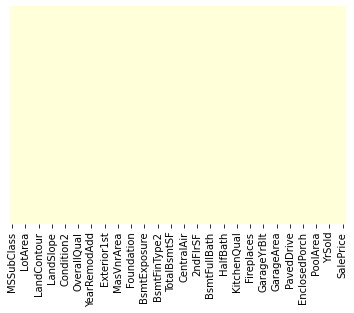

In [515]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [516]:
train.shape

(1460, 76)

In [517]:
i = 1
y = train.columns
for item in y:
#     print(item, '=' ,train[item].dtypes)
    if train[item].dtypes == 'object':
        print(i,'.', item, '=' ,train[item].dtypes)
        i += 1

1 . MSZoning = object
2 . Street = object
3 . LotShape = object
4 . LandContour = object
5 . Utilities = object
6 . LotConfig = object
7 . LandSlope = object
8 . Neighborhood = object
9 . Condition1 = object
10 . Condition2 = object
11 . BldgType = object
12 . HouseStyle = object
13 . RoofStyle = object
14 . RoofMatl = object
15 . Exterior1st = object
16 . Exterior2nd = object
17 . MasVnrType = object
18 . ExterQual = object
19 . ExterCond = object
20 . Foundation = object
21 . BsmtQual = object
22 . BsmtCond = object
23 . BsmtExposure = object
24 . BsmtFinType1 = object
25 . BsmtFinType2 = object
26 . Heating = object
27 . HeatingQC = object
28 . CentralAir = object
29 . Electrical = object
30 . KitchenQual = object
31 . Functional = object
32 . FireplaceQu = object
33 . GarageType = object
34 . GarageFinish = object
35 . GarageQual = object
36 . GarageCond = object
37 . PavedDrive = object
38 . SaleType = object
39 . SaleCondition = object


## Datatype Check

In [518]:
for item in col:
    x = train[item].dtypes
    print(item,'=', x)

MSSubClass = int64
MSZoning = object
LotFrontage = float64
LotArea = int64
Street = object
LotShape = object
LandContour = object
Utilities = object
LotConfig = object
LandSlope = object
Neighborhood = object
Condition1 = object
Condition2 = object
BldgType = object
HouseStyle = object
OverallQual = int64
OverallCond = int64
YearBuilt = int64
YearRemodAdd = int64
RoofStyle = object
RoofMatl = object
Exterior1st = object
Exterior2nd = object
MasVnrType = object
MasVnrArea = float64
ExterQual = object
ExterCond = object
Foundation = object
BsmtQual = object
BsmtCond = object
BsmtExposure = object
BsmtFinType1 = object
BsmtFinSF1 = int64
BsmtFinType2 = object
BsmtFinSF2 = int64
BsmtUnfSF = int64
TotalBsmtSF = int64
Heating = object
HeatingQC = object
CentralAir = object
Electrical = object
1stFlrSF = int64
2ndFlrSF = int64
LowQualFinSF = int64
GrLivArea = int64
BsmtFullBath = int64
BsmtHalfBath = int64
FullBath = int64
HalfBath = int64
BedroomAbvGr = int64
KitchenAbvGr = int64
KitchenQual

In [519]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [520]:

train.SaleCondition.value_counts()
train.shape




(1460, 76)